# Pandas

**Задание 1.**

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5.

In [1]:
# задано изначально
import numpy as np
import pandas as pd

r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))
print(s)

0     4.170220
1     7.203245
2     0.001144
3     3.023326
4     1.467559
        ...   
95    2.370270
96    9.033795
97    5.736795
98    0.028703
99    6.171449
Length: 100, dtype: float64


In [2]:
s[s>5].sort_values().values[0]

5.148891120583086

**Задание 2.**

Имеется небольшой игрушечный DataFrame, в котором необходимо провести несколько типов фильтраций и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [3]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

df

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
1,Вася,26,80000,0.74,муж
2,Аня,41,150000,0.87,жен
3,Света,21,60000,0.68,жен


In [4]:
df[df['возраст'] > 40]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [5]:
df[df['доход'] > df['доход'].mean()]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [6]:
df[(df['доход'] > df['доход'].mean()) & (df['надежность клиента (0..1)'] < df['надежность клиента (0..1)'].mean())]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж


In [7]:
df['важность клиента'] = df['доход'] * df['надежность клиента (0..1)']
df['возможная долгосрочность клиента'] = df['важность клиента'] * (df['возраст'].mean()-df['возраст'])
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


**Задание 3.**

Как объединить два DataFrame по двум столбцам так, чтобы остались только общие строки?

Объедините df1 и df2 по столбцам fruit-frukt и weight-ves.

In [8]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['low', 'medium', 'high'] * 3,
                    'price': np.random.randint(0, 100, 9)})

df2 = pd.DataFrame({'frukt': ['apple', 'banana', 'melon'] * 2,
                    'ves': ['low', 'high'] * 3,
                    'price': np.random.randint(0, 100, 6)})

In [9]:
df3 = pd.DataFrame({
    'fruit-frukt': pd.concat([df1['fruit'], df2['frukt']], ignore_index=True),
    'weight-ves': pd.concat([df1['weight'], df2['ves']], ignore_index=True),
    'price': pd.concat([df1['price'], df2['price']], ignore_index=True)
})
df3

,fruit-frukt,weight-ves,price
0,apple,low,1
1,banana,medium,86
2,orange,high,12
3,apple,low,59
4,banana,medium,43
5,orange,high,95
6,apple,low,92
7,banana,medium,52
8,orange,high,86
9,apple,low,77


**Задание 4.** 
Сгенерировать и добавить номера телефонов следующего вида +7(000)000 00 00 в таблицу



In [10]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)
df

,Name,Age
0,Виктор,18
1,Мария,21
2,Иван,19
3,Иван,25
4,Алексей,20


In [11]:
from random import randint
df['Phone number'] = [f'+7({randint(0,999):03}){randint(0,999):03} {randint(0,99):02} {randint(0,99):02}' for i in range(len(df))]
df

,Name,Age,Phone number
0,Виктор,18,+7(856)996 91 62
1,Мария,21,+7(674)345 97 34
2,Иван,19,+7(490)768 42 46
3,Иван,25,+7(749)610 74 04
4,Алексей,20,+7(574)851 88 92


# Matplotlib

In [12]:
# проверяем установку модуля
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
#классический вариант подключения модуля
#Модуль pyplot — это коллекция функций в стиле команд, которая позволяет использовать matplotlib почти так же, как MATLAB.
import matplotlib.pyplot as plt

***Задание 1***

Скачать файл по ссылке https://disk.yandex.ru/d/ZeDbB3rqhIr1NA , считать через pandas. Получить список уникальных значений - стран в колонке "Country", отфильтровать и получить данные только по выпускникам колледжа. Убрать строки с пропусками в данных (NaN). (В случае ошибок типов можете конвертировать колонки к нужным типам через .astype(str) или .astype(int). Подсчитать макс значение, среднее и СКО для числа детей (household_children) в отфильтрованных данных.

In [14]:
import pandas as pd
df = pd.read_csv("https://downloader.disk.yandex.ru/disk/d1682479e5ba42fc67215ce741442b1f897df466478f547258523b4a53e40ae3/63750860/3v-krRA316KhQDn3zNPZXz_QHKY8WEPOLzf6dYqsasIIu-CAIBqrP65FiHqRFnrXlBZuqD0r-vbXo3WOZFP-zg%3D%3D?uid=0&filename=H1N1_Flu_Vaccines.csv&disposition=attachment&hash=8e4L5RaZw7pZGGkZ9PkL6PzyhKWIqeNP2hpjvun56A/9F7Qpgf7ipakPiDtL0eUuq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=395419075&fsize=5908080&hid=805c06f11004b7f845f59a4f6b5f526e&media_type=spreadsheet&tknv=v2")
pd.set_option('display.max_columns', None)
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [15]:
uniqueListCountry = df['census_msa'].unique() # Не увидел столбца "Country"
print(uniqueListCountry)

['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [16]:
dfWithCollege = df[df['education'] == 'College Graduate'] # Данные по выпускникам колледжа
dfWithCollege.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,4.0,2.0,1.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1,1
12,12,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,5.0,4.0,1.0,65+ Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,NaN,NaN,0,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0,0


In [17]:
dfWithoutNAN = df.dropna() # Очистка строк со значением NaN
dfWithoutNAN.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,2.0,5.0,4.0,4.0,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny,1,1
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,4.0,2.0,1.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0,0


In [18]:
print(df['household_children'].max()) # Максимальное количество детей
print(df['household_children'].mean()) # Среднее количество детей
print(df['household_children'].std()) # СКО по количеству детей

3.0
0.5345831128581148
0.9281733165470456


***Задание 2***

Скачать файл по ссылке https://disk.yandex.ru/i/uoN5eQE1qPCXCQ , считать через pandas второй лист (Olympics). Отфильтровать данные по России и золотым медалистам, построить график разброса возраст-вид_спорта. Построить линейный график на след данных - df.groupby('Year').Age.mean().dropna(). Сохранить графики в pdf. Отфильтровать изначальные данные только по летнему сезону, убрать колонку Город, создать колонку Год рождения, вычислить её через Возраст и Дату проведения, датафрейм сохранить вместе с графиками в архиве и скачать (командами, не через GUI).

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
if not os.path.exists('forArchieve'):
    os.makedirs('forArchieve')

df = pd.read_excel('https://downloader.disk.yandex.ru/disk/2fbb3f638abb62c0c72bb8d4414eb355ae91c28534b2d446e5071887f99f671e/6375118e/3v-krRA316KhQDn3zNPZX4S015EY-ZPr44YyxIvtJX8_qqa7x-TIlQfbnwvYPtXsMqQZNRzziLHJmSmtj_73JA%3D%3D?uid=0&filename=Olympics%202018.xlsx&disposition=attachment&hash=2zAFoShh4kqDUeOz5Z5J/VXwT%2ByF3fHNgn6mQ0yYVQ1mcrNtPl/VAQuXDEBA9Yb3q/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=application%2Fvnd.openxmlformats-officedocument.spreadsheetml.sheet&owner_uid=395419075&fsize=4925078&hid=9428de0ab3410d653ee4a04f6cfd97a6&media_type=document&tknv=v2', sheet_name='Olympics')
df = df.loc[:,:'Notes']  
df.head()

,Sort,Year,Sport,Gender,Event,Athlete,Age,Result,Medal,City,Country,Team,Season,Team Medals,OR,WR,Notes
0,1,1896,Athletics,M,100m,Tom Burke,21.0,12,GOLD,Athens,Greece,United States,Summer,1.0,=ORS/OR,NaN,NaN
1,2,1896,Athletics,M,100m,Fritz Hofmann,24.0,12.2,SILVER,Athens,Greece,Germany,Summer,1.0,NaN,NaN,NaN
2,3,1896,Athletics,M,100m,Francis Lane,21.0,12.6,BRONZE,Athens,Greece,United States,Summer,1.0,ORS,NaN,NaN
3,4,1896,Athletics,M,100m,Alajos Szokolyi,24.0,12.6,BRONZE,Athens,Greece,Hungary,Summer,1.0,NaN,NaN,NaN
4,5,1896,Athletics,M,400m,Tom Burke,21.0,54.2,GOLD,Athens,Greece,United States,Summer,1.0,OR,NaN,NaN


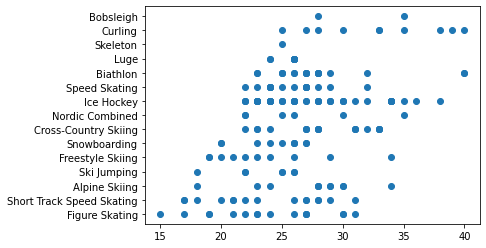

In [20]:
dfGoldRussia = df[(df['Medal']=='GOLD') & (df['Country']=='Russia')].sort_values('Age')
fig, ax = plt.subplots()
ax.scatter(dfGoldRussia['Age'], dfGoldRussia['Sport'])
plt.savefig('forArchieve/GoldRussia.pdf')
plt.show()

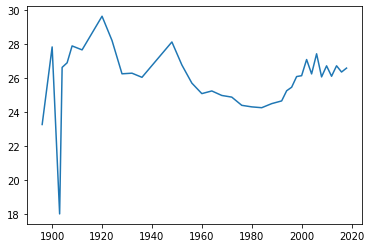

In [21]:
plt.plot(df.groupby('Year').Age.mean().dropna()) 
plt.savefig('forArchieve/MeanAgesByYears.pdf')
plt.show()

In [22]:
newdf = df[df['Season']=='Summer'].drop('City', axis=1)
newdf['BirthYear'] = newdf['Year'] - newdf['Age']
newdf.head()
newdf.to_csv("forArchieve/DataframeWithOlympics.csv", index=False)

In [23]:
!zip -r /content/ArchieveWithOlympics.zip /content/forArchieve/

  adding: content/forArchieve/ (stored 0%)
  adding: content/forArchieve/DataframeWithOlympics.csv (deflated 81%)
  adding: content/forArchieve/GoldRussia.pdf (deflated 32%)
  adding: content/forArchieve/MeanAgesByYears.pdf (deflated 32%)
